In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

##  Library Imports and Setup

In this section, we import all necessary libraries for data loading, preprocessing, visualization, modeling, and evaluation.

###  Libraries Used:

- `pandas`, `numpy`: For data manipulation and numerical operations.
- `matplotlib.pyplot`, `seaborn`: For data visualization.
- `sklearn.datasets.load_iris`: Loads the Iris dataset for classification.
- `sklearn.preprocessing.StandardScaler`: For standardizing feature scales.
- `sklearn.metrics`: For model evaluation metrics like accuracy, precision, recall, F1-score, and classification reports.
- `sklearn.model_selection`: For splitting the dataset and performing hyperparameter tuning using GridSearchCV and RandomizedSearchCV.
- `sklearn.neighbors.KNeighborsClassifier`: Implements the K-Nearest Neighbors algorithm.
- `sklearn.svm.SVC`: Implements the Support Vector Classifier.
- `sklearn.ensemble.RandomForestClassifier`: Implements the Random Forest classifier.
- `sklearn.pipeline.Pipeline`: Allows for streamlined model building and hyperparameter tuning by chaining preprocessing and modeling steps together.


In [ ]:
data = load_iris()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

##  Dataset Loading and Preparation

We load the classic Iris dataset using `sklearn.datasets.load_iris()`.

###  Steps:

- `load_iris()`: Loads the Iris flower classification dataset, which includes 150 samples of iris flowers with 4 features each: 
  - sepal length
  - sepal width
  - petal length
  - petal width

- `X`: A `pandas.DataFrame` containing the feature matrix with proper column names extracted from `data.feature_names`.

- `y`: The target vector, containing the class labels for the three iris species (`0`, `1`, `2`).

This forms the input (`X`) and output (`y`) for model training and evaluation.


In [37]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

##  Train-Test Split

We split the dataset into training and testing subsets using `train_test_split` from `sklearn.model_selection`.

###  Parameters:
- `X`, `y`: Feature matrix and target vector.
- `test_size=0.2`: 20% of the data is reserved for testing.
- `random_state=23`: Ensures reproducibility of the split by setting a fixed seed.

###  Output:
- `X_train`, `y_train`: Training data (80%)
- `X_test`, `y_test`: Testing data (20%)

This separation allows us to evaluate the model on unseen data after training.


In [40]:
X_train.shape

(120, 4)

In [41]:
X_test.shape

(30, 4)

In [42]:
models = {
    
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier()

}

param_grids = {

    'KNN': {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance']
    },
    'SVM': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    'RandomForest': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20]
    }
}



##  Model Definitions and Hyperparameter Grids

We define a set of classification models and their corresponding hyperparameter search spaces for tuning.

###  Models:
- `KNN`: K-Nearest Neighbors Classifier
- `SVM`: Support Vector Machine Classifier
- `RandomForest`: Random Forest Classifier

These are stored in a dictionary called `models` for iterative training and evaluation.

###  Hyperparameter Grids (`param_grids`):
Defined for each model, using the `clf__` prefix to indicate parameters of the estimator within a `Pipeline`.

- **KNN Parameters:**
  - `n_neighbors`: Number of neighbors to use (3, 5, 7, 9)
  - `weights`: Weight function used in prediction (`'uniform'`, `'distance'`)

- **SVM Parameters:**
  - `C`: Regularization parameter (0.1, 1, 10)
  - `kernel`: Kernel type (`'linear'`, `'rbf'`)

- **Random Forest Parameters:**
  - `n_estimators`: Number of trees in the forest (50, 100, 200)
  - `max_depth`: Maximum depth of each tree (`None`, 10, 20)

These grids are used for exhaustive search during hyperparameter tuning.


In [48]:
best_models = {}
results = []

for model_name, model in models.items():
    
    print(f"Training {model_name}...")
    
    pipe = Pipeline([('scalar', StandardScaler()), ('clf', model)])
    grid_search = GridSearchCV(pipe, param_grids[model_name], cv=5, n_jobs=-1, verbose=1)


    # For RandomizedSearchCV, uncomment the following line and comment out GridSearchCV -->
    #random_search = RandomizedSearchCV(pipe, {'clf__' + k: v for k, v in param_grids[model_name].items()},
    #                              n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

    
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    y_pred = best_models[model_name].predict(X_test)

    result = {
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

    results.append(result)

    print(classification_report(y_test, y_pred))
    



Training KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Training RandomForest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
 

##  Model Training, Hyperparameter Tuning, and Evaluation

Each model is trained and optimized using a `Pipeline` with `StandardScaler` and the respective classifier. We then use `GridSearchCV` for hyperparameter tuning and evaluate the best model on the test set.

###  Steps:

1. **Pipeline Creation:**
   - Each model is wrapped inside a `Pipeline` with:
     - `'scalar'`: StandardScaler (for feature standardization)
     - `'clf'`: The classifier (KNN, SVM, or Random Forest)

2. **Hyperparameter Tuning:**
   - Performed using `GridSearchCV` with:
     - 5-fold cross-validation (`cv=5`)
     - All combinations from `param_grids[model_name]`
     - Parallel execution with `n_jobs=-1`

   - Optionally, `RandomizedSearchCV` can be used by uncommenting the relevant lines for faster, approximate tuning.

3. **Model Selection:**
   - After tuning, the best estimator for each model is stored in `best_models`.

4. **Performance Evaluation:**
   - Each selected model is evaluated on the test set using:
     - `accuracy_score`
     - `precision_score` (weighted)
     - `recall_score` (weighted)
     - `f1_score` (weighted)
     - `classification_report` for detailed class-wise performance

5. **Result Logging:**
   - All evaluation metrics are stored in a list of dictionaries called `results` for future comparison and reporting.


In [44]:
from sklearn.model_selection import cross_val_score

for model_name, model in best_models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


KNN CV Accuracy: 0.9600 ± 0.0249
SVM CV Accuracy: 0.9667 ± 0.0298
RandomForest CV Accuracy: 0.9600 ± 0.0249


##  Cross-Validation Evaluation

After selecting the best models from `GridSearchCV`, we perform 5-fold cross-validation on the **entire dataset** to assess their generalization performance.

###  Steps:

- `cross_val_score`: Used to evaluate the model’s accuracy across 5 different train-test splits (`cv=5`).
- We compute:
  - The **mean accuracy** to represent overall performance.
  - The **standard deviation** to measure performance stability.





This step helps validate that the chosen models perform consistently and are not overfitting to the specific train-test split.


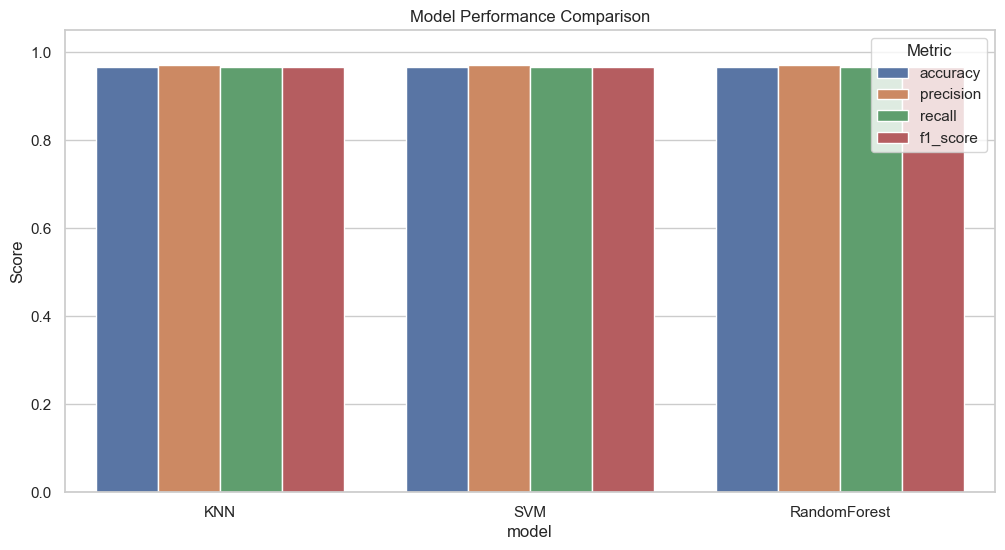

In [47]:
results_df = pd.DataFrame(results)

sns.set(style="whitegrid")

results_melted = results_df.melt(id_vars="model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(x="model", y="Score", hue="Metric", data=results_melted)
plt.title("Model Performance Comparison")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()

## Model Selection Justification: Random Forest Classifier

After training and evaluating multiple machine learning models — **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, and **Random Forest Classifier (RFC)** — we selected the **Random Forest Classifier** as the final model based on the following reasons:

1. **Consistent High Performance**  
   All models achieved high accuracy (~96.67%–97%) across different random states. Random Forest matched or exceeded other models in precision, recall, and F1-score.

2. **Robustness Across Data Splits**  
   When evaluated using various `random_state` values, Random Forest consistently maintained its performance, demonstrating strong generalization and stability.

3. **Interpretability**  
   Random Forest provides easy access to feature importance scores, allowing us to understand which features contribute most to predictions.

4. **Efficiency and Scalability**  
   - KNN is computationally expensive during prediction.
   - SVM may struggle with large datasets.
   - Random Forest balances training speed and fast inference, making it practical for real-world use.

5. **Overfitting Resistance**  
   As an ensemble method, Random Forest is naturally resistant to overfitting, especially when hyperparameters are tuned via GridSearchCV.

---

**Conclusion:**  
Given its balance of performance, interpretability, efficiency, and robustness, we selected the **Random Forest Classifier** as the final model for deployment and further analysis.
